In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [36]:
df = pd.read_csv('./heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [12]:
print(df.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 207


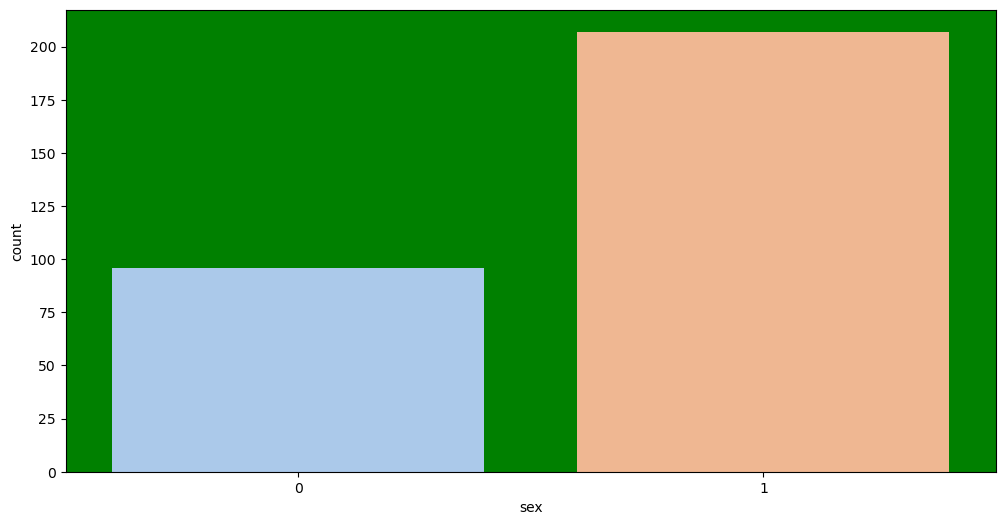

In [45]:
#EDA
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=df, x="sex", palette='pastel')

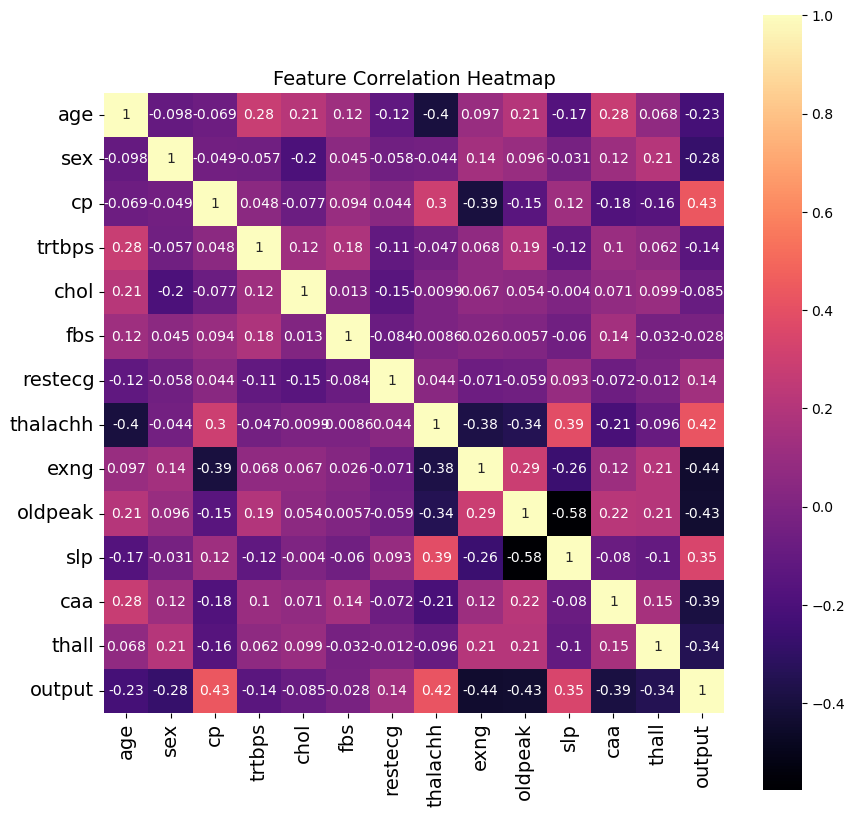

In [28]:
plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

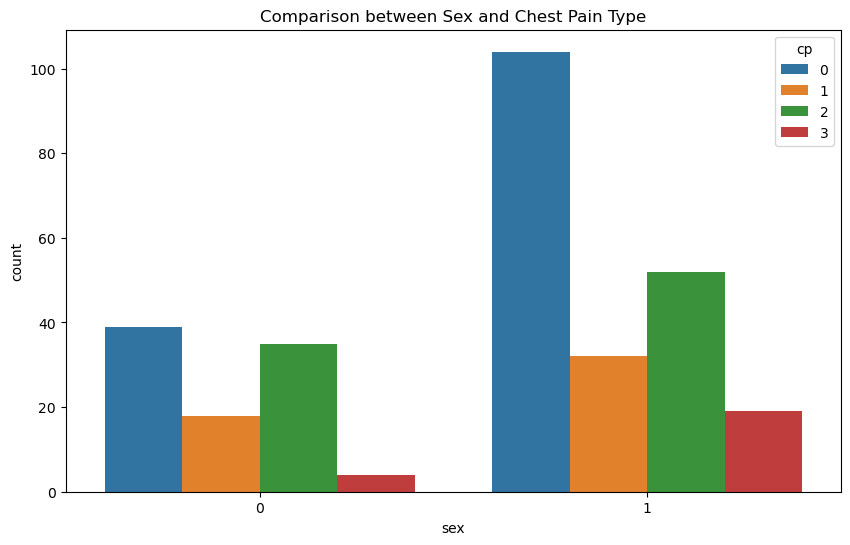

In [21]:
#compare sex and cp
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='cp', data=df)
plt.title('Comparison between Sex and Chest Pain Type')
plt.show()

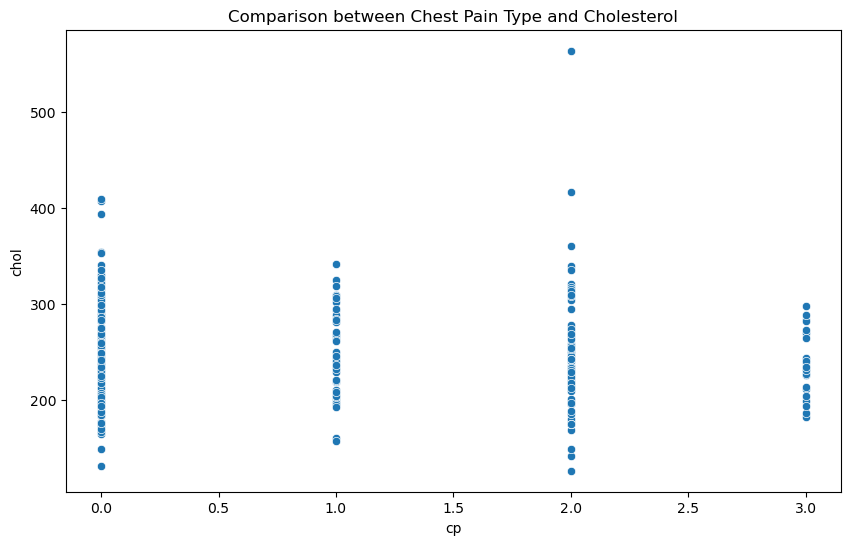

In [30]:
#compare cp and chol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cp', y='chol', data=df)
plt.title('Comparison between Chest Pain Type and Cholesterol')
plt.show()

In [38]:
# Split the data into features (X) and target (y)
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# Create and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Create and train the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Create and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions with the models
lr_preds = lr.predict(X_test)
knn_preds = knn.predict(X_test)
rf_preds = rf.predict(X_test)


In [43]:
# Evaluate the models
print("Logistic Regression Accuracy: ", accuracy_score(y_test, lr_preds))
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_preds))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_preds))

Logistic Regression Accuracy:  0.8524590163934426
K-Nearest Neighbors Accuracy:  0.9016393442622951
Random Forest Accuracy:  0.8688524590163934


In summary, there were no outliers in the numeric variables examined. The data strongly suggests that elevated blood pressure, high cholesterol levels, and an increased heart rate significantly raise the risk of a heart attack. Specifically, the analysis indicates a higher likelihood of a heart attack occurrence within certain demographics: individuals between 40 and 60 years old face a heightened risk. Additionally, the male gender appears to have a higher susceptibility to heart attacks compared to females. Notably, the dataset reveals strong correlations between age and both blood pressure (trtbps) as well as cholesterol (chol) levels, emphasizing their interrelation in assessing the risk of heart-related issues.